# Data Collection

# Importing necessary libraries

In [1]:
# to deactivate warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [4]:
data = pd.read_csv("EV Population_Data.csv")

In [11]:
df = pd.DataFrame(data)

In [13]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


# Data Preprocessing - Data Cleaning

In [15]:
print("Shape of the dataset is: ")
df.shape

Shape of the dataset is: 


(232230, 17)

In [17]:
print("Columns: ")
df.columns

Columns: 


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [19]:
print("Dataset Information:")
print("\t")
df.info()

Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              

In [21]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232226.000000,232230.000000,232203.000000,232203.000000,231749.000000,2.322300e+05,2.322260e+05
mean,98180.172044,2021.353727,46.755998,803.808973,28.880979,2.343671e+08,5.298177e+10
std,2489.407943,2.994884,84.373596,7246.597102,14.904503,6.831418e+07,1.507814e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [23]:
print("Unique Values: ")
print("\t")
df.nunique()

Unique Values: 
	


VIN (1-10)                                            13560
County                                                  209
City                                                    786
State                                                    49
Postal Code                                             950
Model Year                                               21
Make                                                     46
Model                                                   170
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          109
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       232230
Vehicle Location                                        948
Electric Utility                                         76
2020 Census Tract                       

In [25]:
missing_values = df.isnull().sum()
print("Missing Values:")
print("\t")
print(missing_values)

Missing Values:
	
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        27
Base MSRP                                             27
Legislative District                                 481
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


In [27]:
# filling null values of numeric features

num_col = df.select_dtypes(include=['number']).columns
df[num_col] = df[num_col].fillna(df[num_col].mean())

In [29]:
# filling null values of non-numeric features

non_num_col = df.select_dtypes(include=['object']).columns
df[non_num_col] = df[non_num_col].fillna("Missing")

In [31]:
missing_values = df.isnull().sum()
print("Missing Values after imputation:")
print("\t")
print(missing_values)

Missing Values after imputation:
	
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


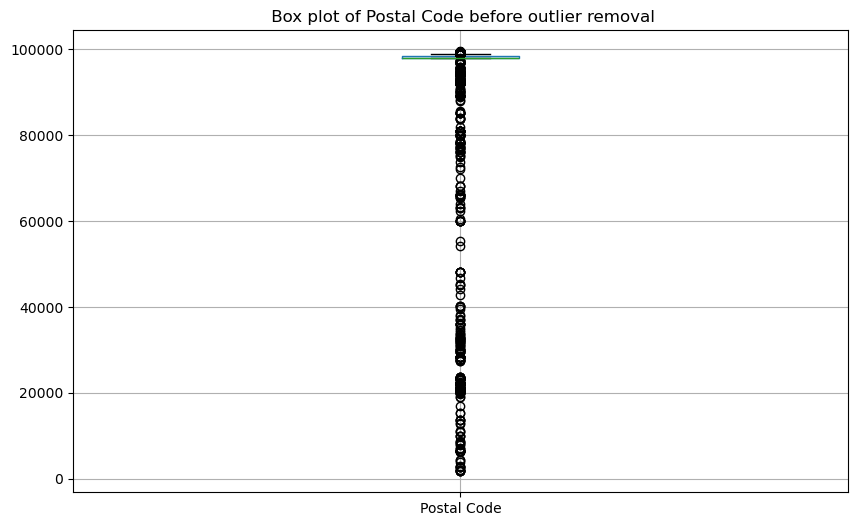

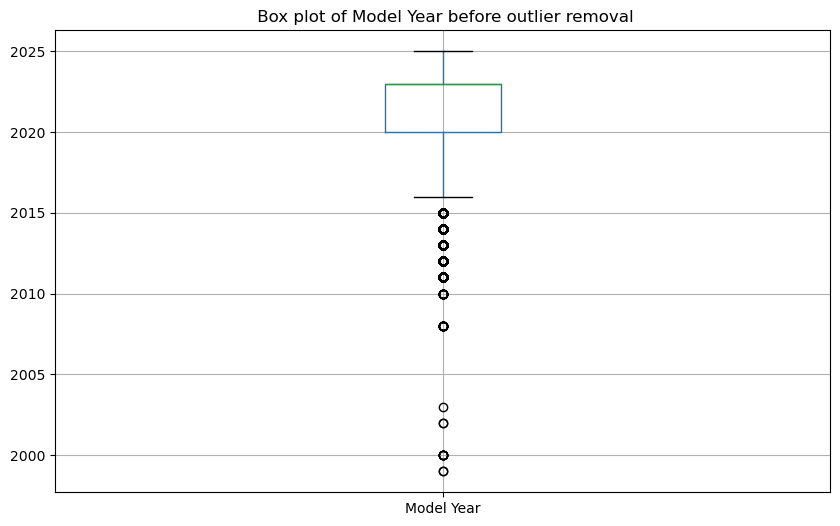

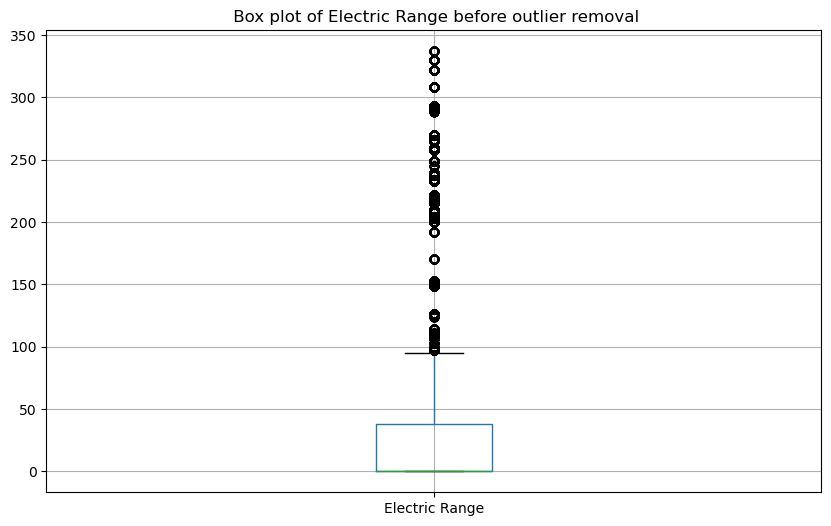

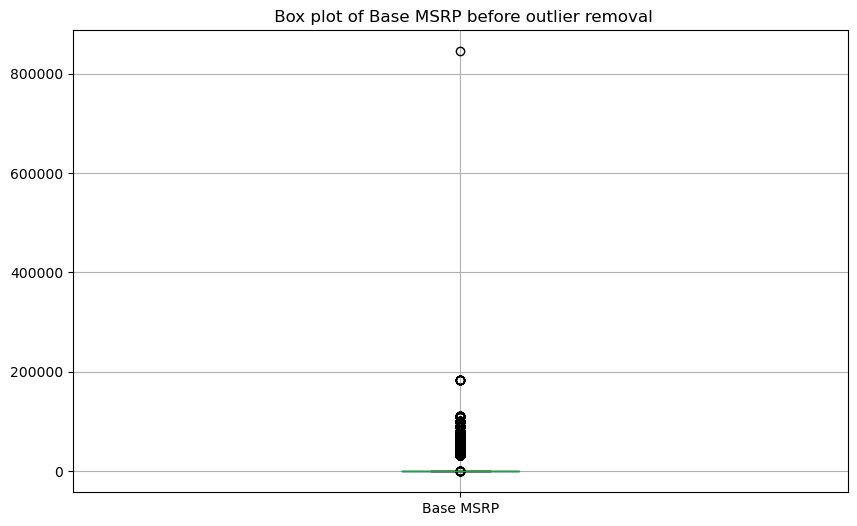

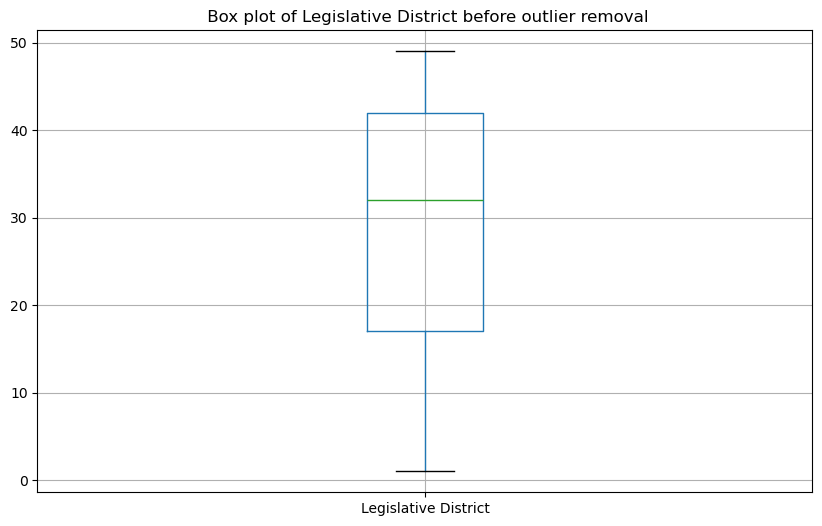

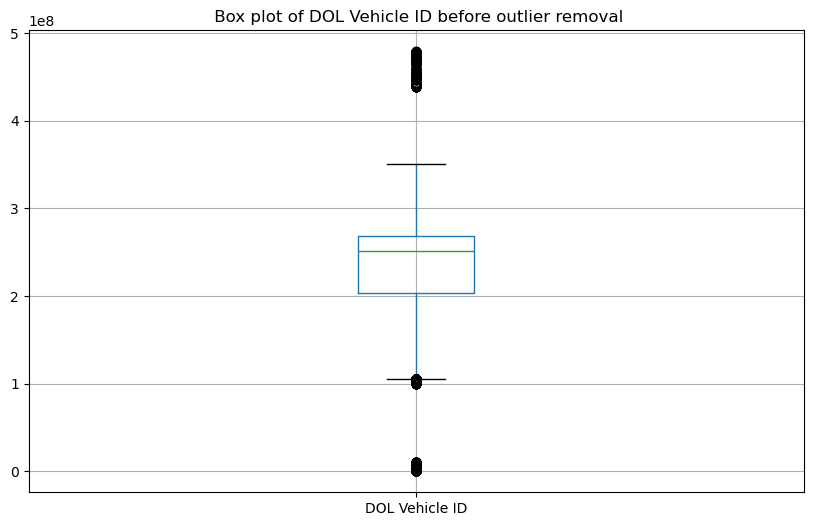

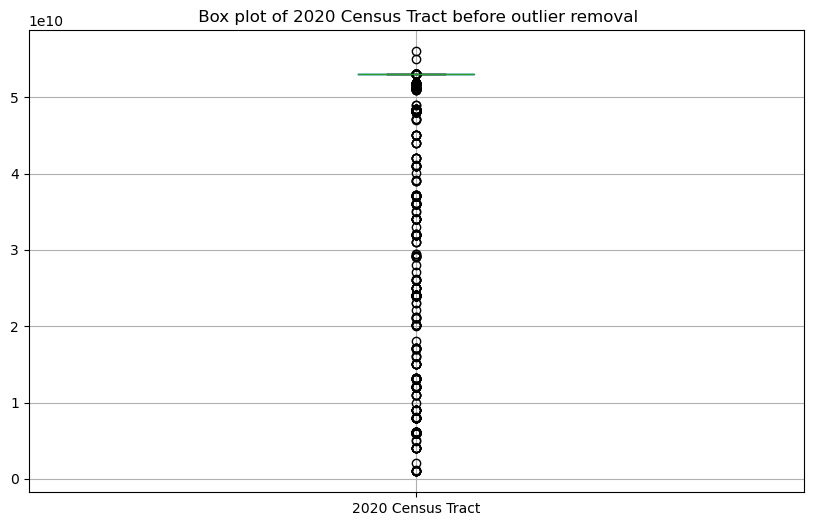

In [33]:
# Visualizing Outliers

num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} before outlier removal")
    plt.show()

In [35]:
# Outlier removal

def handle_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5* IQR
        upper = Q3 + 1.5* IQR
        df[col] = df[col].clip(lower,upper)
    return df

In [37]:
columns = df.select_dtypes(include=['number']).columns
columns = columns.drop('Base MSRP')
columns
df = handle_outlier(df,columns)

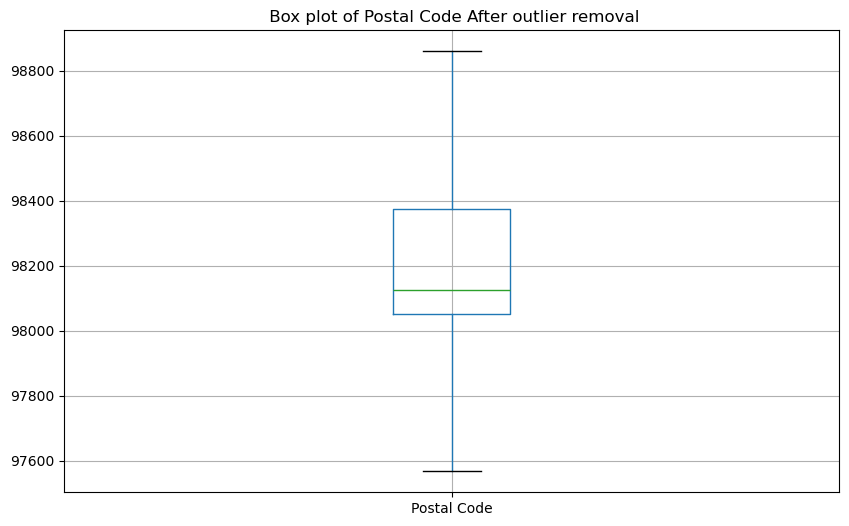

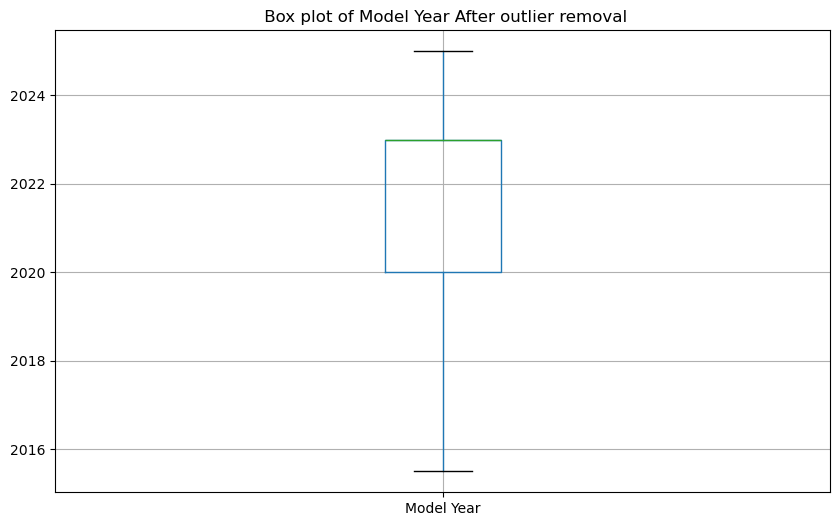

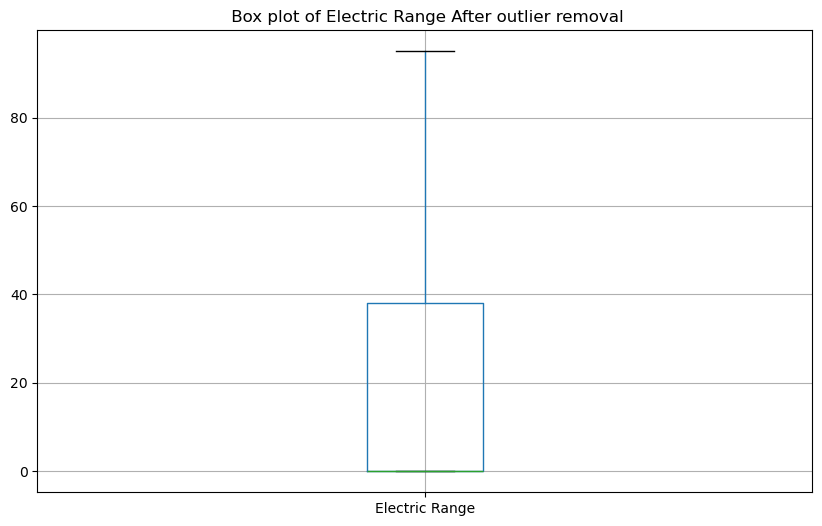

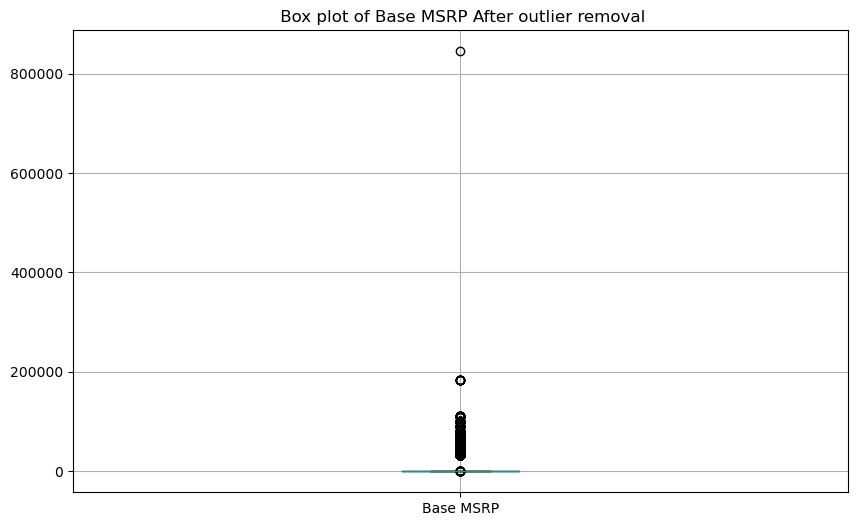

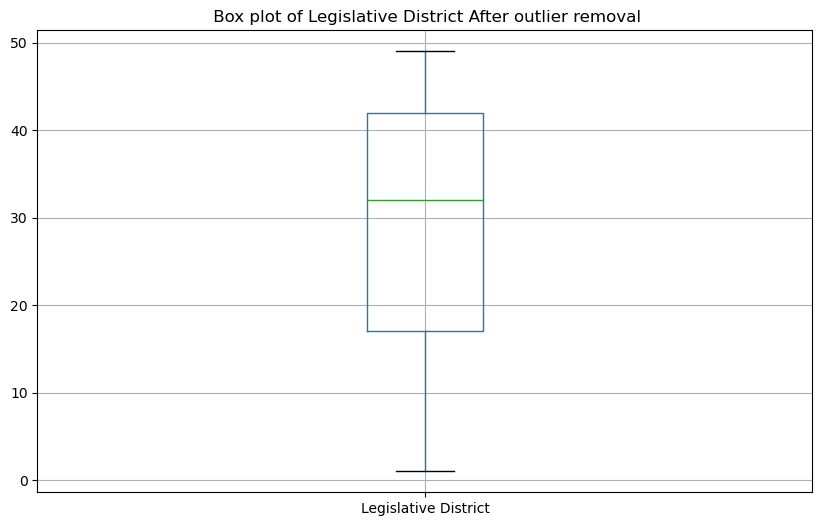

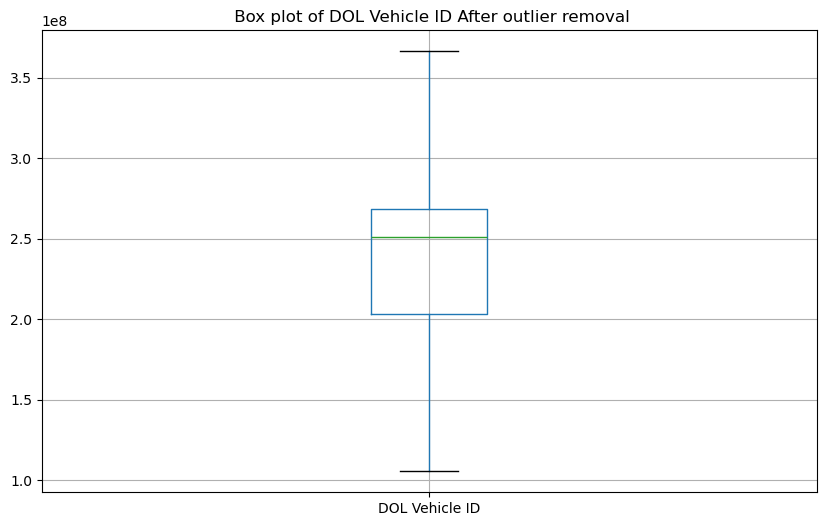

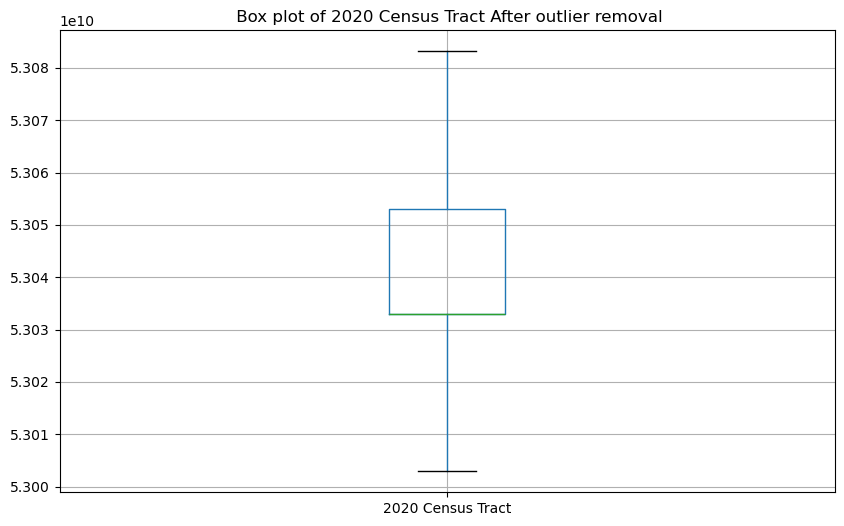

In [39]:
num_column = df.select_dtypes(include = ['number'])

for col in num_column.columns:
    plt.figure(figsize = (10,6))
    num_column.boxplot(column = col)
    plt.title(f" Box plot of {col} After outlier removal")
    plt.show()

In [41]:
# Checking skewness

skewness = df.select_dtypes(include=['number']).skew()
skewness

Postal Code              1.084591
Model Year              -0.916872
Electric Range           1.118410
Base MSRP               15.597454
Legislative District    -0.430323
DOL Vehicle ID          -0.478368
2020 Census Tract        0.224248
dtype: float64

In [43]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print("Skewed Features are :\n", skewness[skewed_feature])

Skewed Features are :
 Postal Code        1.084591
Model Year        -0.916872
Electric Range     1.118410
Base MSRP         15.597454
dtype: float64


In [45]:
df['Base MSRP'] = np.log1p(df['Base MSRP'])
skewness = df.select_dtypes(include=['number']).skew()
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.084591
Model Year       -0.916872
Electric Range    1.118410
Base MSRP         8.227318
dtype: float64


In [47]:
df['Model Year'] = df['Model Year'].max() - df['Model Year'] + 1
df['Model Year'] = np.log1p(df['Model Year'])

In [49]:
skewed_feature = skewness[(skewness< -0.5)|(skewness> 0.5)].index
print(skewness[skewed_feature])

Postal Code       1.084591
Model Year       -0.916872
Electric Range    1.118410
Base MSRP         8.227318
dtype: float64


In [51]:
# Applying PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[skewed_feature] = pt.fit_transform(df[skewed_feature])

In [57]:
print("Skewness after applying yeo-johnson: \n", df.select_dtypes(include=['number']).skew())

Skewness after applying yeo-johnson: 
 Postal Code             0.000000
Model Year             -0.007220
Electric Range          0.403724
Base MSRP               8.203830
Legislative District   -0.430323
DOL Vehicle ID         -0.478368
2020 Census Tract       0.224248
dtype: float64


In [59]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,-1.443290e-15,1.684049,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.355037,-0.120136,41.0,1.864502e+08,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,-1.443290e-15,1.034691,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.355037,-0.120136,1.0,3.665252e+08,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,1.665335e-15,-2.235860,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,1.142654,-0.120136,35.0,2.748007e+08,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,1.720846e-15,-1.102670,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,1.156072,-0.120136,2.0,2.607582e+08,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,3.830269e-15,0.473797,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,-0.828785,-0.120136,15.0,2.365814e+08,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [61]:
# Label encoding

X_train = df.drop(['VIN (1-10)', 'Base MSRP'], axis=1)
y_train = df['Base MSRP']

In [63]:
cat_col = X_train.select_dtypes(include = ['object'])
le = LabelEncoder()
for col in cat_col.columns:
    X_train[col] = le.fit_transform(X_train[col])

# Exploratory Data Analysis (EDA)

In [65]:
numeric_data = df.select_dtypes(include=['float64','int64'])

In [67]:
correlation_matrix = numeric_data.corr()
correlation_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,0.036204,0.066397,-0.001342,-0.393553,0.004858,0.036079
Model Year,0.036204,1.000000,0.620259,0.173031,0.014980,-0.404871,0.002864
Electric Range,0.066397,0.620259,1.000000,0.140990,-0.018214,-0.197091,-0.003567
Base MSRP,-0.001342,0.173031,0.140990,1.000000,0.009829,-0.051486,0.000037
Legislative District,-0.393553,0.014980,-0.018214,0.009829,1.000000,-0.012077,-0.100441
DOL Vehicle ID,0.004858,-0.404871,-0.197091,-0.051486,-0.012077,1.000000,-0.002383
2020 Census Tract,0.036079,0.002864,-0.003567,0.000037,-0.100441,-0.002383,1.000000


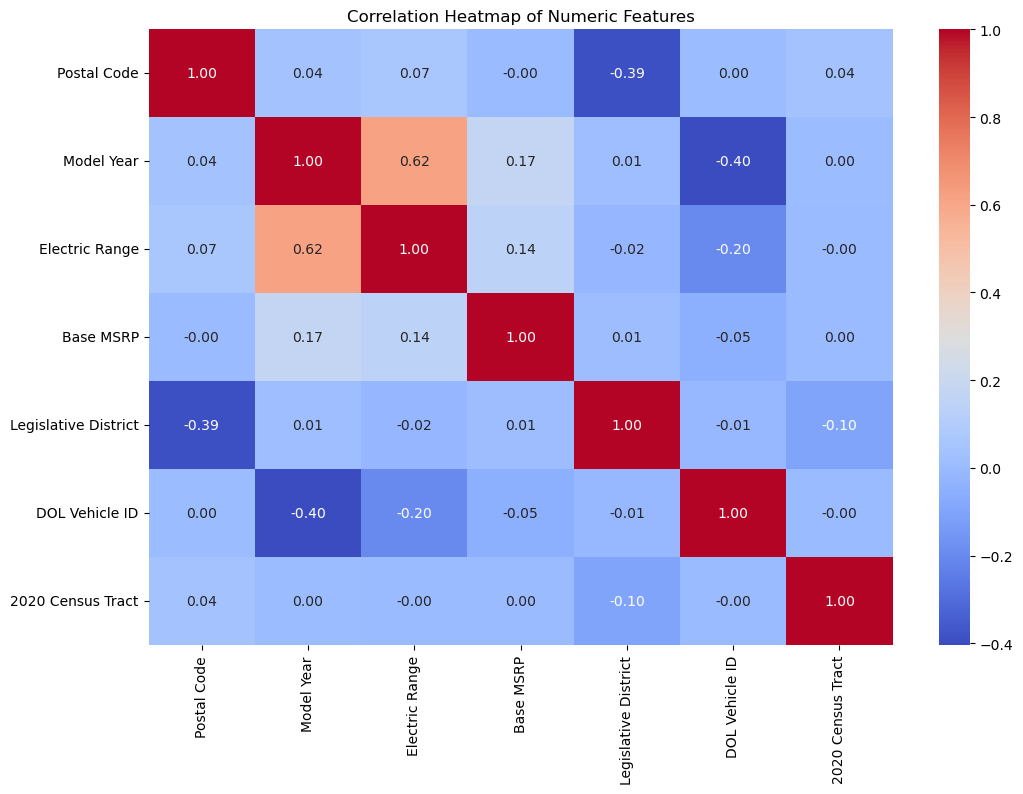

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

* The heatmap shows a clear pattern of high correlation between some features, such as:
    * Base MSRP and Electric Range
    * Model Year and Base MSRP
* Some features have low correlation with others, such as:
    * Postal Code and most other features
* There are some clusters of highly correlated features, such as:
    * Base MSRP, Electric Range, and Model Year

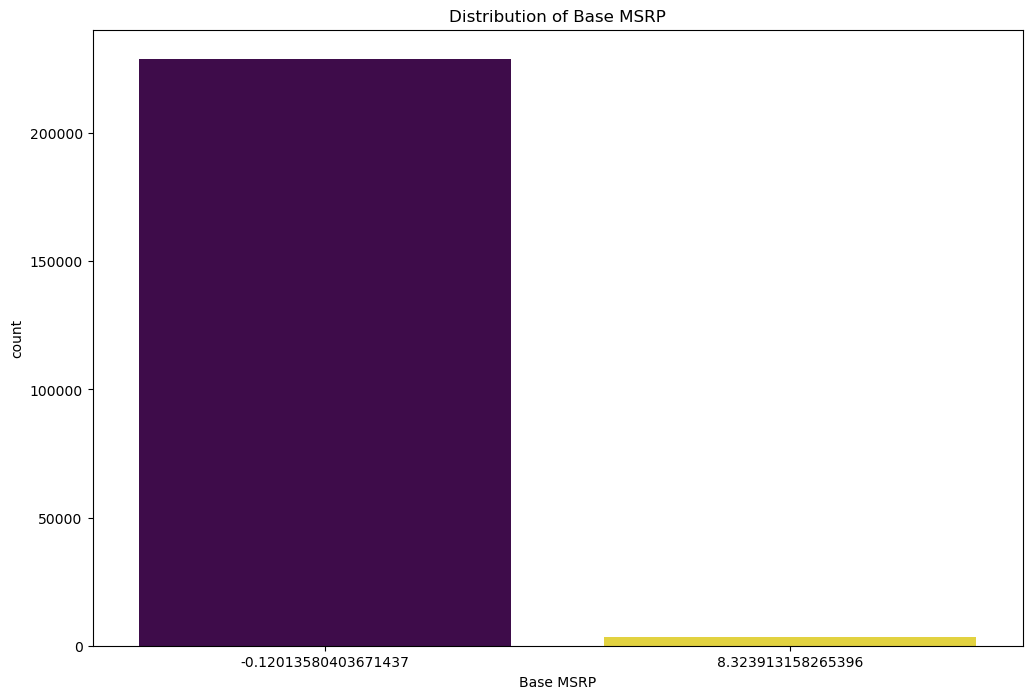

In [73]:
# Count Plot of Base MSRP
plt.figure(figsize=(12,8))
sns.countplot(x ='Base MSRP', data=df,  hue='Base MSRP', legend=False, palette='viridis')
plt.title("Distribution of Base MSRP")
plt.show()

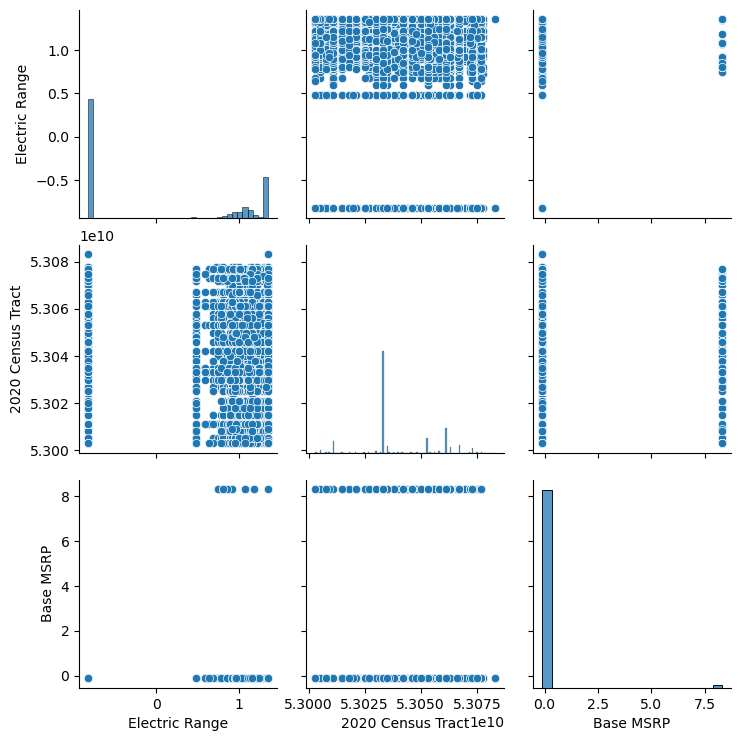

In [75]:
# Pair plot for selected features
sns.pairplot(df[['Electric Range', '2020 Census Tract', 'Base MSRP']])
plt.show()

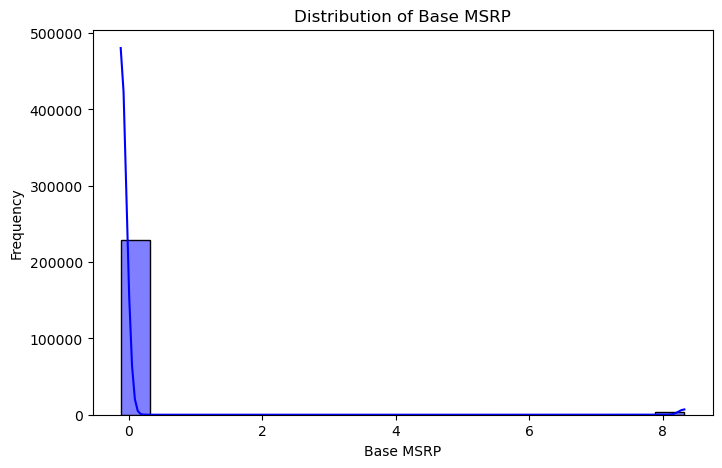

In [77]:
# Distribution of the Target Variable 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.histplot(df['Base MSRP'], kde=True, color='blue')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP")
plt.ylabel("Frequency")
plt.show()

# Feature selection

In [79]:
# Feature selection

selector = SelectKBest(score_func = f_regression, k=10)
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
feature = X_train.columns
score = selector.scores_

feature_score = pd.DataFrame({
    'Feature' : feature,
    'Score' : score
}).sort_values(by = 'Score' , ascending = False)
selected_feature = selected_features.to_list()
print("Feature scores")
feature_score

Feature scores


,Feature,Score
4,Model Year,7167.475494
9,Electric Range,4709.898084
11,DOL Vehicle ID,617.222843
7,Electric Vehicle Type,559.246110
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,183.438468
10,Legislative District,22.437839
1,City,5.887289
12,Vehicle Location,3.028344
6,Model,2.721786
13,Electric Utility,2.099906


In [81]:
print("Selected Features")
selected_feature

Selected Features


['City',
 'Model Year',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility']

In [83]:
X_train = X_train[selected_feature]

## Feature Scaling

In [85]:
# Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Splitting the data into training and testing sets

In [87]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)

# Build the ML Model:

In [89]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor()
}

# Model Evaluation:

In [91]:
result = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    result[model_name] = {
    "R2 Score" : r2,
    "MSE" : mse,
    "MAE" : mae,
    "RMSE" : rmse}
result = pd.DataFrame(result).T
print(result)

                                R2 Score       MSE       MAE      RMSE
1. Linear Regression            0.033640  0.919050  0.268538  0.958671
2. Decision Tree Regressor      0.625915  0.355771  0.042651  0.596466
3. Random Forest Regressor      0.766650  0.221927  0.044386  0.471091
4. Gradient Boosting Regressor  0.755026  0.232981  0.079700  0.482681
5. Support Vector Regressor     0.072350  0.882236  0.154764  0.939274
6. MLP Regressor                0.687218  0.297469  0.179675  0.545407


In [93]:
# Finding The Best Model
best_model = result['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(result.loc[best_model])

The best Model based on R2 Score is:
 3. Random Forest Regressor
R2 Score    0.766650
MSE         0.221927
MAE         0.044386
RMSE        0.471091
Name: 3. Random Forest Regressor, dtype: float64


# Conclusion:
The best-performing model based on the R2 Score is the Random Forest Regressor with

* R2 Score: 0.765246
* MSE: 0.223261
* MAE: 0.044539
* RMSE: 0.472505

# Hyperparameter Tuning:

In [95]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [97]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',verbose =1, n_jobs=-1)

In [99]:
# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best parameters and score
print(f"Best Parameters: {best_param}")
print(f"Best Cross-Validation MSE Score: {-best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation MSE Score: 0.22265163352913783


In [103]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the results
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 0.2080721740727857
Test MAE: 0.2080721740727857
Test R2: 0.7812170956593105
Test RMSE: 0.4561492892384967


In [105]:
# Cross-validate the model  
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 0.22265163352913783


# Pipeline Creation

In [108]:
pipeline = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='mean')),  # Step to handle missing values  
    ('scaler', StandardScaler()),                 # Step to standardize features  
    ('model', grid_search.best_estimator_),       # Use the best estimator from GridSearchCV  
])  

In [110]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=10,
                                       n_estimators=200, random_state=42))])

# Saving the model:

In [113]:
# Save the entire pipeline
joblib.dump(pipeline,'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

# Test with Unseen Data:

In [150]:
# Load the saved pipeline model for prediction
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')

In [208]:
# Load unseen data for prediction and analysis
unseen_data = pd.read_csv('unseen.data.csv')
unseen_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103,0,41,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023604
1,5YJ3E1EB6K,King,Bothell,WA,98011,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022102
2,5UX43EU02S,Thurston,Olympia,WA,98502,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,35,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,53067011902
3,JTMAB3FV5R,Thurston,Olympia,WA,98513,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,2,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,53067012332
4,5YJYGDEE8M,Yakima,Selah,WA,98942,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15,236581355,POINT (-120.53145 46.65405),PACIFICORP,53077003200


In [210]:
unseen_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,1.490000e+02
mean,98360.939597,2018.557047,127.248322,1097.651007,22.463087,2.286041e+08,5.305239e+10
std,298.700886,3.468746,99.597834,7685.051160,13.818086,1.071851e+08,1.635475e+07
min,98005.000000,2000.000000,0.000000,0.000000,1.000000,2.102971e+06,5.301997e+10
25%,98118.000000,2017.000000,33.000000,0.000000,13.000000,1.528023e+08,5.303508e+10
50%,98311.000000,2018.000000,84.000000,0.000000,22.000000,2.351412e+08,5.306105e+10
75%,98503.000000,2020.000000,215.000000,0.000000,35.000000,2.726739e+08,5.306701e+10
max,99362.000000,2025.000000,322.000000,55700.000000,48.000000,4.780937e+08,5.307794e+10


In [212]:
for column in unseen_data.columns:
    unseen_data[column] = le.fit_transform(unseen_data[column])

In [218]:
# Split unseen data into features (X) and target (y)
X_unseen = unseen_data.drop('Base MSRP', axis =1)
y_unseen = unseen_data['Base MSRP']

In [222]:
selector = SelectKBest(score_func = f_regression, k =10)

X_new = selector.fit_transform(X_unseen,y_unseen)

selected_features = X_unseen.columns[selector.get_support()]

# get score for each features
feature_names = X_unseen.columns
scores = selector.scores_

feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score' : scores
}).sort_values(by = 'Score', ascending =False)
print(feature_scores)

# Get the name of selected features
X_selected_features = feature_names[selector.get_support()].tolist()
print(f"\nSelected Features: {X_selected_features}")

                                              Feature      Score
9   Clean Alternative Fuel Vehicle (CAFV) Eligibility  19.626867
8                               Electric Vehicle Type   8.918310
0                                          VIN (1-10)   5.774783
10                                     Electric Range   5.755500
6                                                Make   3.640895
7                                               Model   2.576993
13                                   Vehicle Location   1.377757
4                                         Postal Code   0.677199
11                               Legislative District   0.533072
14                                   Electric Utility   0.432566
1                                              County   0.262195
12                                     DOL Vehicle ID   0.184772
15                                  2020 Census Tract   0.151965
2                                                City   0.094432
5                        

In [224]:
print("Selected Features")
selected_feature

Selected Features


['County',
 'City',
 'Postal Code',
 'Model Year',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Legislative District',
 'Electric Utility',
 '2020 Census Tract']

In [228]:
# Predict the target variable for the unseen data
y_pred_unseen = loaded_pipeline.predict(X_new)

In [230]:
# Evaluate model performance on the unseen data
mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)
rmse_unseen = np.sqrt(mse_unseen)

# Print evaluation metrics to assess model performance
print(f"Unseen Data MSE: {mse_unseen}")
print(f"Unseen Data MAE: {mae_unseen}")
print(f"Unseen Data R2: {r2_unseen}")
print(f"Unseen Data RMSE: {rmse_unseen}")

Unseen Data MSE: 1.4728400170918334
Unseen Data MAE: 0.9524505177625232
Unseen Data R2: -14.950498155832099
Unseen Data RMSE: 1.2136062034662782
